# Ising magnets
## Physics 481
## Week 4



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Dipole energy

It can be shown that the energy $U$ required to align a magnetic dipole $m$ in a magnetic field $B$ is given by

  $$U = - \vec m \cdot \vec B = - m B \cos\theta $$

where $\theta$ is the angle between the dipole moment and field directions.  The lowest energy configuration occurs if they are parallel

  $$ U = - m B $$

while the largest amount of energy is stored in the system if the dipole and field are pointing in opposite directions

  $$ U = + m B $$

## Boltzman distribution

If a small system is in thermal equilibrium with heat-sink of temperature T, then the probability of states should be Boltzman distributed

$$ p(\mathbf x) \propto \exp \left(-\frac{E(\mathbf x)}{k T}\right) $$

Consider the simplest possible case of two states with energies $E_1$ and $E_2$.  The normalized probabilities are

  $$ p_1 = C\, \exp \left(-\frac{E_1}{k T}\right) $$

  $$ p_2 = C\, \exp \left(-\frac{E_2}{k T}\right) $$

The relative probability of two different states is

$$ r = \frac{p_f}{p_i} = e^{(E_2-E_1)/kT} $$

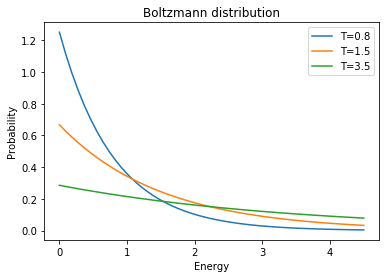

In [2]:
ax = plt.subplot(xlabel="Energy", ylabel="Probability", title="Boltzmann distribution")
E = np.linspace(0, 4.5, num=50)

for i, T in enumerate([0.8, 1.5, 3.5]):
    ax.plot(E, 1.0/T*np.exp(-E/T), "-", label="T={}".format(T))
ax.legend();

## Partition function

The normalization constant $C$ can be determined by using the fact that the total of all probabilities must sum to 1

  $$ \sum_k p_k = 1$$
  
For the two spin system this gives

  $$ C\, \exp \left(-\frac{E_1}{k T}\right) + C\, \exp \left(-\frac{E_2}{k T}\right) = 1 $$

so

$$ C = \frac{1}{e^{\left( -\frac{E_1+E_2}{k T} \right)}} $$

It will be more convenient to work with the reciprocal of this constant

$$ Z = e^{\left(-\frac{E_1+E_2}{k T}\right)} $$

which is also known as the "partition function".  This allows us to express the probabilities as

  $$ p_k = \frac{1}{Z}\, \exp \left(-\frac{E_k}{k T}\right) $$


## $\beta \propto 1/T$

For further convenience, we can define a new term

  $$ \beta = \frac{1}{k_B T}  $$

which is inversely proportional to temperature so that

  $$ p_k = \frac{e^{-\beta E_k}}{Z} $$


### Gibbs
For two states it is relatively simple to calculate the probabilities

 $$ p_+ = \frac{1}{1 + \exp(-\beta \Delta E )} 
 \qquad \Delta E = E_+ - E_- $$

and generate random sequences

In [3]:
state = np.random.choice([-1, +1], p=[0.5,0.5])
state

1

## Many independent states

Consider a collection of $N$ independent dipoles with state $S=\pm 1$ in an external magnetic field $B$.  The energy associated with the entire system is given by  

  $$ E = -B \sum_k S_k $$
  
For example, with 2 independent distinguishable dipoles there are 4 possible states 

      S1  S2   Energy  Probability (un-normalized)
     +1  +1   -2B      exp(+beta 2B)
     +1  -1    0B      1
     -1  +1    0B      1
     -1  -1    2B      exp(-beta 2B)
     
but only 3 unique energy configurations, so the partition function is given by

 $$ Z = \exp(-2B \beta) + 2 \exp(0) + \exp(+2B \beta) $$

 $$ p_i = \frac{e^{-E/T}}{Z} $$

state = np.random.choice([(+1,+1),(+1,-1),(-1,+1),(-1,-1)], p=[p1,p2,p3,p4])

Question: Write a function which will calculate all of the energy states and probabilities for an arbitrary number of independent dipoles.  Tabulate the results for $N=3$, $\beta=0.1$ and $B=2$

Question: Write a function which will return a Boltzmann random state for an arbitrary number $N$ of independent dipoles.  Plot the time required to produce the result as a function of $N$.  Discuss your results.

## Monte Carlo

The behavior of a single dipole in thermal equilibrium with an external field will depend on quantum mechanics, electrodynamics, and statistical physics.  However, it is also possible to gain some physical insight using a very simple model.

We can use a cellular automaton approach with a single element.  At each time step the state may be either +1 (up) or -1 (down).  We also require that the sequence of states must be consistent with a Boltzmann probability distribution.

For $N$ binary elements there will be $2^N$ configurations. Applying the Gibb's sampler will become computationally challenging long before we reach Avagadro's number.

### Metropolis

Another way to do this is with the Metropolis algorithm. It is based on markov chains and uses an equilibrium condition called detailed balance to prove a simple assumption: If the system is in a state with energy E0 and we flip the value of a single spin so that the system has now E1, the probability to accept that change should be:

p=min(1,exp(−ΔE/T)) with ΔE=E1−E0

In other words, if we start in a high energy state then we will always flip into a low energy state.  If we are in a lower energy state there is some small chance of flipping into a high energy state.  This "uphill" transition is more likely for higher temperatures and less likely for low temperatures.

Question: Use the metropolis algorithm to generate a sequence of states for a single dipole with T=300K, dE=0.1, 1, 10eV.  Calculate the expected probabilities for each state and compare to the computed results for 1000 iterations.

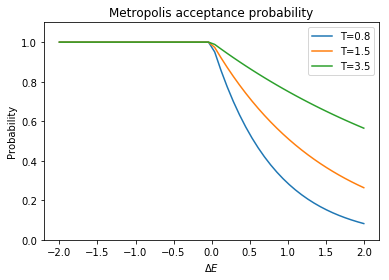

In [5]:
ax = plt.subplot(xlabel="$\Delta E$", ylabel="Probability", ylim=(0,1.1), title="Metropolis acceptance probability")
dE = np.linspace(-2, 2)

for i, T in enumerate([0.8, 1.5, 3.5]):
    ax.plot(dE, np.minimum(1, np.exp(-dE/T)), "-", label="T={}".format(T))
ax.legend();

## Interacting 1D
Each dipole will generate a (small) magnetic field that may influence other dipoles.  We can explore this possibility by arranging a number of binary spins $S_k$ in a row (or a ring) and then introduce a weak coupling term

 $$ E_i = -J \,S_{i-1} S_i - J \,S_{i+1} S_k
  = -J \sum_j S_i S_j  \qquad j=i+1, i-1
 $$
that can only effect the nearest neighbors.

Question: Write some python code to evolve a system of $N$ dipoles in a ring (wrap-around boundary conditions) using the Metropolis algorithm for arbitrary $N$, $B$, $T$, $J$.

## The Ising model

Read the notes in D2L: Ising_Model_MIT_Notes.pdf

Read through this notebook: http://nbviewer.jupyter.org/github/s9w/magneto/blob/master/physics.ipynb
or get from D2L: Ising_Model.ipynb



Consider a lattice of N sites, each containing a spin $S_n$ where $n=1,\ldots,N$.  Each spin can be either "up" ($S_n = +1$) or down ($S_n=-1$).  Each spin interacts magnetically with its nearest neighbors and with an external magnetic field (if present).  The Hamiltonian for this Ising model is

$$ E(S_1,\ldots,S_N) = -J \sum_{i,j} S_i S_j - B \sum_k S_k $$

where the interaction sum $i,j$ is over the four nearest-neighbour pairs of spins ie. $S_{ij}$ interacts with $S_{i\pm 1,j}$ and $S_{i,j \pm 1}$ and the diagonal neighbors are ignored.

### Stochastic
Any randomly created lattice will have some total energy $E$.  Flipping a single electron might require adding or removing a tiny bit of energy $dE$.  If the lattice is in thermal equilibrium with a "heat-sink" of temperature T, then the probability of states should be Boltzman distributed

$$ p(\mathbf x) \propto \exp(-\frac{E(\mathbf x)}{k T}) $$

and the relative probability of two different states is

$$ r = \frac{p_f}{p_i} = e^{(E_f-Ei)/kT} $$

If we only consider the effect of a single flip $S_n$, then 

$$ r = e^{-2 S_n (J f + B)/kt} $$

where all the information about neighbors is gathered into a term

$$  f = S_{i+1,j} + S_{i-1,j} + S_{i,j+1} + S_{i,j-1}$$

with only five possible values ($0, \pm 2, \pm 4$).  With two possible values of $S_n$ there are only 10 possible values for $r$, so we could compute these once at the beginning of the program in order to avoid re-calculating the same expensive exponentials over and over.

Write python code to implement the Ising model on a 51x49 grid for arbitrary J and B.  Use 200 sweeps to thermalize and assume that the grid is randomized after 20 sweeps.

Produce representative grid plots for J=(kB T), B=0, B=+0.5, B=-0.5

For B=0 and J/(T kB)=range(0.0, 0.6, 21), calculate and plot the average magnetization M versus J/TkB.

Produce a hysteresis curve over an appropriate range of external magnetic field B values.

Produce a representative grid plot for J=-kB T.

Briefly discuss all of your results.